In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def f(t,y):
    f1 = -.04*y[0] + 1e4*y[1]*y[2]
    f2 =  .04*y[0] - 1e4*y[1]*y[2] - 3e7*y[1]**2
    f3 = 3e7*y[1]**2
    return np.array([f1, f2, f3])

def Jacf(t,y):
    return np.array([[-.04, 1e4*y[2], 1e4*y[1] ],\
                     [.04, -1e4*y[2] -3e7*2*y[1], -1e4*y[1] ],\
                     [0, 3e7*2*y[1], 0]])


y0 = [1, 0, 0]
tspan = [0, 10]
solRK23 = solve_ivp(f, tspan, y0, method='RK23', rtol=1e-6, atol=1e-9)
solRK45 = solve_ivp(f, tspan, y0, method='RK45', rtol=1e-6, atol=1e-9)
solBDF = solve_ivp(f,  tspan, y0,  method='BDF', rtol=1e-6, atol=1e-9)
solBDFJ = solve_ivp(f, tspan, y0, method='BDF', jac=Jacf, rtol=1e-6, atol=1e-9)

In [2]:
%%timeit
solRK23 = solve_ivp(f, tspan, y0, method='RK23')

409 ms ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
%%timeit
solRK45 = solve_ivp(f, tspan, y0, method='RK45')

37.5 ms ± 468 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%%timeit
solBDF = solve_ivp(f, tspan, y0, method='BDF')

5.38 ms ± 38 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%%timeit
solBDFJ = solve_ivp(f, tspan, y0, method='BDF', jac=Jacf)

5.1 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
#solBDFJ = solve_ivp(f, tspan, y0, method='BDF',jac=Jacf)
#solBDFJ.t - solBDF.t

In [ ]:
solBDF.y - solBDFJ.y

<IPython.core.display.Javascript object>


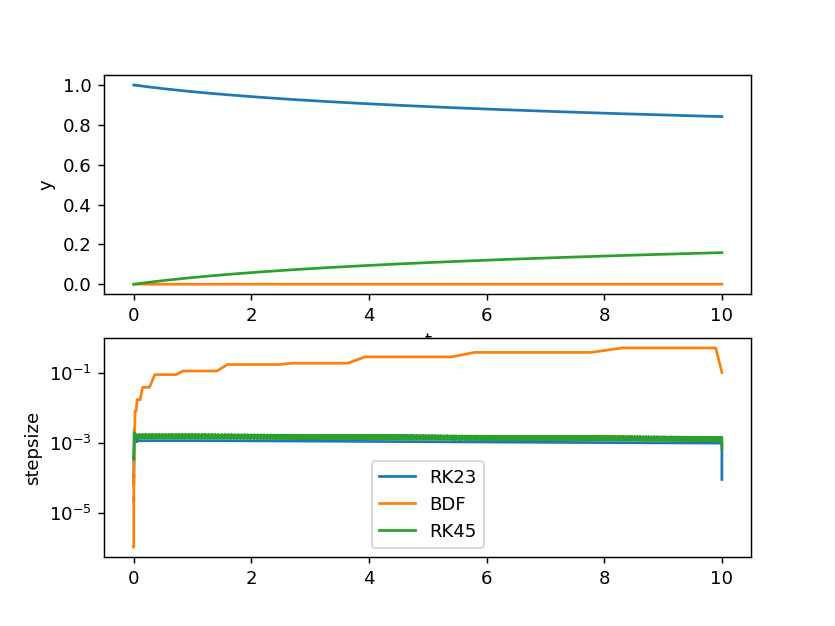

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for i in range(solRK23.y.shape[0]):
    ax1.plot(solRK23.t, solRK23.y[i])
    
ax1.set_ylabel('y')
ax1.set_xlabel('t')
ax2.semilogy(solRK23.t[1:], np.diff(solRK23.t), label="RK23")
ax2.semilogy(solBDF.t[1:], np.diff(solBDF.t), label="BDF")
ax2.semilogy(solRK45.t[1:], np.diff(solRK45.t), label="RK45")

ax2.set_ylabel('stepsize')
ax2.legend();